# Capstone Project

Rui Cao, Udacity

## I. Definition

### Project Overview: 

In the used car market, one important problem is to determine a used car's price. A seller always tries to sell the car with a price as high as possible. Meanwhile, price of a car is often a very significant factor for the costumer's choice of buying. So, an effective estimation of price would provide very useful guide for both the sellers and buyers when dealing with a used car. Generally speaking, the determination of a used car's price depends on its brand, model, year of usage, and many other factors. This makes the determination of a used car very complicated. Therefore, a machine learning method would be proper to explore the hidden relation between those factors and the used car's price.

Once the model is established, it can provide some references to other problems as well. For example, evaluating the attrition of a current processed car, or predicting whether a car needs to be replaced. 

### Problem Statement:

This problem is for a dataset crawled from ebay. The dataset provides every
details of the used car ads posted on ebay within a period of time, from March 2016
to April 2016. Most of the details are presumably related the price determination.
Moreover, most of those details can be quantified or treated in a quantitative way.
Meanwhile, as the price appears in the format of a number, one way to compare the
prediction and actual value is to take an absolute value of the difference between these two quantities, i.e. the absolute error. From all the above, it is
expected that a prediction of the car's price can be made based on these information
through the method of machine learning.

The dataset consists 371528 rows of data. Each row represents the data of a used car ads and contains following fields:

[dateCrawled] The date when the ad was first crawled. All other fields comes from the ad on this date.

[name] Name of the car, it may contain information of brand, model, etc.

[seller] Private seller or dealer.

[offerType] Offer type is the same for all data, so this field is useless.

[price] The price on the ad to sell the car. This is the quantity needs to be estimated. So this field will removed from the data.\item[abtest] A ebay-intern variable.

[vehicleType] One of the eight vehicle categories.

[yearOfRegistration] The year that the car was first registered.

[gearbox] Type of the car's gearbox, manual or automatic.

[powerPS] Power of the car in PS.

[model] The car's model.

[kilometer] Number of kilometers the car has driven.

[monthOfRegistration] The month that the car was first registered.

[fuelType] One of the seven fuel categories of a car.

[brand] Brand of a car.

[notRepairedDamage] If the has a damage which is not repaired yet.

[dateCreated] The data for which the ad at ebay was created.

[nrOfPictures] Since there is a bug in the crawler, all numbers in this field is 0. So the field is useless.

[postalCode] The place in Germany where the car is located in.

[lastSeenOnline] The time that the crawler saw this ad last online.

### Metrics:

Since the price of a car appears to be a number. The actual price advertised can be directly compared with the prediction price. The model may be evaluated using mean absolute error between the two prices, which are:

\begin{equation*}
E_{abs}=\frac{\sum_{i=1}^N |P_{p}-P_{a}|}{N}
\end{equation*}

where $E_{abs}$ is the mean absolute error, $P_p$ is the prediction of the car's price, $P_a$ is the car price advertised.

## II.Analysis 

### Data Exploration:

First import neccessary tools and the dataset. Some samples are presented to have a first observation of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

data = pd.read_csv("autos.csv",keep_default_na=False)

display(data.head(4).transpose())
display(data.tail(3).transpose())

,0,1,2,3
dateCrawled,2016-03-24 11:52:17,2016-03-24 10:58:45,2016-03-14 12:52:21,2016-03-17 16:54:04
name,Golf_3_1.6,A5_Sportback_2.7_Tdi,"Jeep_Grand_Cherokee_""Overland""",GOLF_4_1_4__3T�RER
seller,privat,privat,privat,privat
offerType,Angebot,Angebot,Angebot,Angebot
price,480,18300,9800,1500
abtest,test,test,test,test
vehicleType,,coupe,suv,kleinwagen
yearOfRegistration,1993,2011,2004,2001
gearbox,manuell,manuell,automatik,manuell
powerPS,0,190,163,75


,371525,371526,371527
dateCrawled,2016-03-19 18:57:12,2016-03-20 19:41:08,2016-03-07 19:39:19
name,Volkswagen_Multivan_T4_TDI_7DC_UY2,VW_Golf_Kombi_1_9l_TDI,BMW_M135i_vollausgestattet_NP_52.720____Euro
seller,privat,privat,privat
offerType,Angebot,Angebot,Angebot
price,9200,3400,28990
abtest,test,test,control
vehicleType,bus,kombi,limousine
yearOfRegistration,1996,2002,2013
gearbox,manuell,manuell,manuell
powerPS,102,100,320


First observation provides following conclusions:

1. It's hard to tell the meaning of the 'abtest' field. So it's difficult to explore the relation between this field and price determination.

2. The field 'name' basicly contains the information of a car's brand and model, so that field is closed related to the fields of 'brand' and 'model'.

3. The fields 'seller', 'offerType' and 'nrOfPictures' are possiblly having the same value for all records. If that is true, then those fields are useless for price determination.

4. The fields 'vehicleType', 'model', 'gearbox', 'feulType' and 'notRepairedDamage' are having some records without value in it, i.e., having an empty string as the value. So all potential useful fields will be checked to see if there are the records having empty values in the field.

5. There are unreasonable values in 'powerPS' and 'monthOfRegistration' fields. They are supposed to be non-zero. So all numerical fields will be checked to see if there are unreasonable values.

6. Though 'monthOfRegistration' and 'postalCode' appear in numerical forms, they don't have specific quantitative meanings with respect to the price determination. So they should be treated the same as text fields.

7. The date fields, 'dateCrawled', 'dateCreated' and 'lastSeen'appear in text forms. But they can be transformed into numerical forms by calculating the number of days between the value and a fixed level date.

Now we check the distribution of the data in 'seller', 'offerType' and 'nrOfPicutres' fields.

In [2]:
display("Distribution of data in the 'seller' field.")
display(data.groupby('seller').size())
display("Distribution of data in the 'offerType' field.")
display(data.groupby('offerType').size())
display("Distribution of data in the 'nrOfPictures' field.")
display(data.groupby('nrOfPictures').size())

"Distribution of data in the 'seller' field."

seller
gewerblich         3
privat        371525
dtype: int64

"Distribution of data in the 'offerType' field."

offerType
Angebot    371516
Gesuch         12
dtype: int64

"Distribution of data in the 'nrOfPictures' field."

nrOfPictures
0    371528
dtype: int64

As can be seen, all records have the same value in 'nrOfPictures' field. So this feature is useless for price determination and will be dropped from the dataset. While too few records are having value 'Gesuch' in the 'offerType' field, or value 'gewerblich' in the 'seller' field. So those records won't be considered in this problem. Then the two fields will be dropped from the dataset.

For all the other text fields, check if there records with empty values in those fields.

In [3]:
fields_to_check=['dateCrawled','name','abtest','vehicleType','gearbox','model','fuelType',\
                 'brand','notRepairedDamage','dateCreated','lastSeen']
for field in fields_to_check:
    print("There are  {} records with empty values in the field '{}'.".format(len(data[data[field]=='']),field))

There are  0 records with empty values in the field 'dateCrawled'.
There are  0 records with empty values in the field 'name'.
There are  0 records with empty values in the field 'abtest'.
There are  37869 records with empty values in the field 'vehicleType'.
There are  20209 records with empty values in the field 'gearbox'.
There are  20484 records with empty values in the field 'model'.
There are  33386 records with empty values in the field 'fuelType'.
There are  0 records with empty values in the field 'brand'.
There are  72060 records with empty values in the field 'notRepairedDamage'.
There are  0 records with empty values in the field 'dateCreated'.
There are  0 records with empty values in the field 'lastSeen'.


As mentioned before, missing value in the 'model' field may be repaired by the information extracted from the 'name' field. While for missing valus in other fields 'vehicleType', 'gearbox', 'fuelType' and 'notRepairedDamage', there are no obvious way to repair them using existed information. So those records with empty values in these four fields will be discarded.

Then take a look at the numerical fields, to see if there are any unreasonable values in the fields.

In [4]:
display(data[['price','yearOfRegistration','powerPS','kilometer','monthOfRegistration','postalCode']].describe())

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,99998.00000


Some further observations about the numerical fields:

1. Unreasonable 0 values appear in the field 'price', 'yearOfRegistration', 'powerPS', and 'monthOfRegistration'.

2. Unreasonable early and late years, such as '1000' and '9999', appear in the field 'yearOfRegistration'.

3. Most of the price data fall into range of thousands of dollars, while there are unreasonable high prices, such as 2.1e9.

4. There are unreasonable high values, such as '20000', appear in the field 'powerPS'.

5. More than half of the used cars advertised are having value 150000 in the field 'kilometer'. This indicated that data in the field kilometer may be inaccurate. It is highly possible that in ebay, the largest possible value that can be filled for a used car's kilometer is 150000.

Based on the above observations, records with unreasonable values will be discrded.

A common sense provides the ranges of values in fields of 'yearOfRegistration' and 'powerPS'. 'yearOfRegistration' should be within the interval of [1950,2016] to make sure the car advertised is a used car, instead of a new car, or an antique car. The number of 'powerPS' should be less than 1500, the known highest powerPS of a car.

It's obvious that the price data have many outliers, so the top 0.1% prices are cut off. The remain records have a more reasonable maximum value and should have much less outliers than before.

In [5]:
display(data[data['price']<data.price.quantile(0.999)].price.describe())

count    371156.000000
mean       5616.158338
std        7559.086800
min           0.000000
25%        1150.000000
50%        2950.000000
75%        7200.000000
max      108500.000000
Name: price, dtype: float64

### Exploratory Visualization:

For records with reasonable values, make scatter plots of 'price' vs 'yearofRegistration', 'powerPS', and 'kilometer' respectively. From the plots below, it can be seen that, there are no obvious linear relations between the numerical features and the price data.

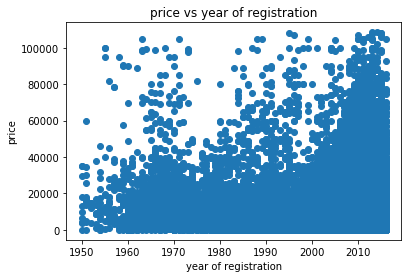

In [6]:
data_valid=data[(data.yearOfRegistration<2017) & (data.yearOfRegistration>=1950)]
data_valid=data_valid[(data_valid.powerPS>0) & (data_valid.powerPS<=1500)]
data_valid=data_valid[data_valid.price<=data.price.quantile(0.999)]
fig1=plt.figure()
ax=fig1.add_subplot(1,1,1)
ax.scatter(data_valid['yearOfRegistration'],data_valid['price'])
plt.title('price vs year of registration')
plt.xlabel('year of registration')
plt.ylabel('price')

The price for most cars with powerPS larger than 800 fall below $20000, for cars with powerPS less than 800, their prices have a much larger range.

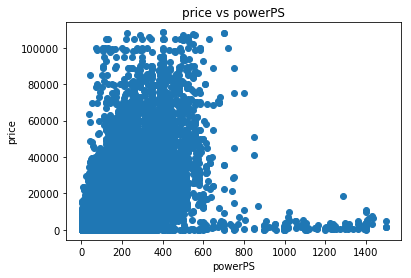

In [7]:
fig2=plt.figure()
ax=fig2.add_subplot(1,1,1)
ax.scatter(data_valid['powerPS'],data_valid['price'])
plt.title('price vs powerPS')
plt.xlabel('powerPS')
plt.ylabel('price')

From the plot below, there are only a few values in the field 'kilometer'. This can be futher verified by grouping the 'kilometer' field. This characteristic of the 'kilometer' field suggests that a value in 'kilometer' field is possible to represent a range of the kilometers a car has driven, for example, '90000' means the car has driven more than 90000 kilometers but less than 100000.

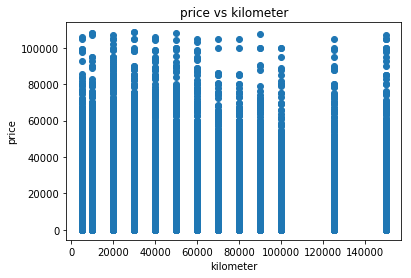

In [8]:
fig3=plt.figure()
ax=fig3.add_subplot(1,1,1)
ax.scatter(data_valid['kilometer'],data_valid['price'])
plt.title('price vs kilometer')
plt.xlabel('kilometer')
plt.ylabel('price')

In [9]:
display("Distribution of data in the 'kilometer' field.")
display(data.groupby('kilometer').size())

"Distribution of data in the 'kilometer' field."

kilometer
5000        7069
10000       1949
20000       5676
30000       6041
40000       6376
50000       7615
60000       8669
70000       9773
80000      11053
90000      12523
100000     15920
125000     38067
150000    240797
dtype: int64

Then plot histograms of the fields 'price', 'yearOfRegistration', 'powerPS', and 'kilometer' to check their distributions. As can be seen, data in 'price', 'yearOfRegistration', and 'kilometer' fields are skewed distributed.

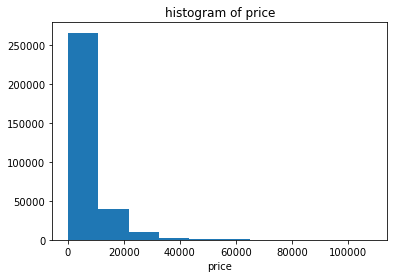

In [10]:
plt.hist(data_valid.price)
plt.title("histogram of price")
plt.xlabel("price")

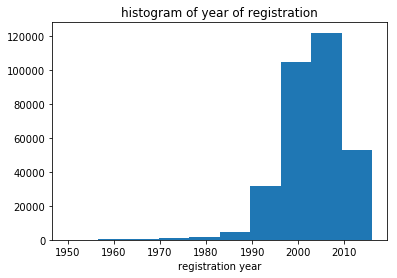

In [11]:
plt.hist(data_valid.yearOfRegistration)
plt.title("histogram of year of registration")
plt.xlabel("registration year")

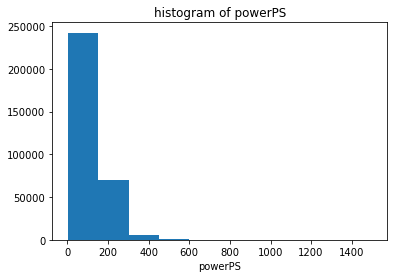

In [12]:
plt.hist(data_valid.powerPS)
plt.title("histogram of powerPS")
plt.xlabel("powerPS")

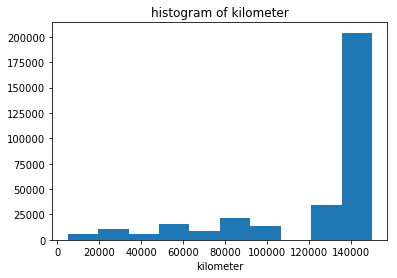

In [13]:
plt.hist(data_valid.kilometer)
plt.title("histogram of kilometer")
plt.xlabel("kilometer")

### Algorithms and Techniques:

To this problem, a multilayer neural network model will trained based on the processed data from the dataset.

A multilayer neural network properly deals with the following characteristics:

1. Large size of dataset. A well chosen multilayer neural network is complicated enough to extract desired information from a large size of data.

2. Nonlinear relation between input features and the target variable. With activation functions added within each layer, a multilayer neural network is able to simulate the nonlinear relation between the inputs and outputs.

The original dataset will be processes as following to generate the input features:

1. 'nrOfPictures' field is dropped because all values in this field are 0.

2. Records with minority value in 'seller' or 'offerType' fields will be discarded. Then the two fields are dropped.

3. Records with unreasonable value in 'price', 'powerPS', 'yearOfRegistration', or 'monthOfRegistration' fields are discarded.

4. Records with empty value in 'gearbox', 'vehicleType', 'fuelType' or 'notRepairedDamage' fields are discarded.

5. Records with empty value in 'model' field are repaired by extracting information from 'name' field. Then records not fixed are discarded and 'name' field is dropped.

6. 'dateCrawled', 'dateCreated' and 'lastSeen' fields are transformed into numerical forms, by first converting string values in the fields into datetime data, then the datetime data are transformed into numerical data by calculating the days between the date in the data and a fixed level date.

7. 'price' field will be extracted as the target variable data.

8. 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage', and 'monthOfRegistration' fields will be treated as text fields. One-hot encoding will be applied to generate input features from the values in those fields.

9. Values in 'postalCode' field will be cut off the last three digits, then the remained one or two digits will be treated as text, to generate input features using one-hot encoding.

10. 'powerPS', 'yearOfRegistration' and 'kilometer' fields will be treated as numerical fields, and normalized by a min-max scaler.

Once the inputs features and price data are ready, they will be split into train set, validation set and test set in a ratio of 6:2:2 by randomly picking from the processed dataset.

Before training a multilayer model, a simple mean value prediction model will be constructed as the benchmark. Then a neural network without inner layer and activation functions will be trained to see how a linear model performs on this problem. A single layer neural network with activation function will be tested to see if a nonlinear model improves the performance. Then a final model will be trained and its hyper-parameters will be tuned.

There are several hyper-parameters need to be tuned in the model, number of layers, number of nodes in each layer, type of activation functions, and dropout rate. All the hyper-parameters will be tuned by grid searching in a specific set.

### Benchmark: 

First a naive predictor will be created as the benchmark. The predictor simply uses the mean value of all prices in train set as its prediction for an unseen car, i.e.:

\begin{equation*}
P_n=\frac{\sum_{i=1}^{N_0} P_{t,i}}{N_0}
\end{equation*}

where $P_n$ is the naive prediction of the price, $N_0$ is the number of samples in train set, $P_{t,i}$ is the $i$-th price data in the train set.

# III. Methodology 

### Data Pre-Processing: 

As mentioned before, the original dataset will be processes as following:

1. 'nrOfPictures' field is dropped because all values in this field are 0.

2. Records with minority value in 'seller' or 'offerType' fields will be discarded. Then the two fields are dropped.

3. Records with empty value in 'gearbox', 'vehicleType', 'fuelType' or 'notRepairedDamage' fields are discarded.

4. Records with empty value in 'model' field are repaired by extracting information from 'name' field. Then records not fixed are discarded and 'name' field is dropped. Strings in 'brand' and 'model' fields will be turned into upper case to eliminate duplications with different cases.

5. Records with unreasonable value in 'price', 'powerPS', 'yearOfRegistration', or 'monthOfRegistration' fields are discarded. Then records with top 0.1% prices are discarded.

6. 'dateCrawled', 'dateCreated' and 'lastSeen' fields are transformed into numerical forms, by first converting string values in the fields into datetime data, then the datetime data are transformed into numerical data by calculating the days between the date in the data and a fixed level date.

7. Values in 'postalCode' field will be cut off the last three digits, then the remained one or two digits will be treated as text.

8. 'price' field will be extracted as the target variable data.

9. 'abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage', 'monthOfRegistration' and processed 'postalCode' fields will be treated as text fields. One-hot encoding will be applied to generate input features from the values in those fields.

10. 'powerPS', 'yearOfRegistration' and 'kilometer' fields will be treated as numerical fields, and normalized by a min-max scaler.

In [15]:
data = pd.read_csv("autos.csv",keep_default_na=False)
input_data=data.drop('nrOfPictures',1)
input_data=input_data[input_data['seller']=='privat']
input_data=input_data[input_data['offerType']=='Angebot']
input_data=input_data.drop(['seller','offerType'],1)

input_data=input_data[input_data['gearbox']!='']
input_data=input_data[input_data['vehicleType']!='']
input_data=input_data[input_data['fuelType']!='']
input_data=input_data[input_data['notRepairedDamage']!='']

model_set=set(input_data.model.str.upper())
model_set.remove('')
input_data.name=input_data.name.str.upper()
input_data.name=input_data.name.str.split('_')

for index,row in input_data.iterrows():
    if input_data.model[index]=='':
        for name_pcs in input_data.name[index]:
            if name_pcs in model_set:
                input_data.loc[index,'model']=name_pcs
                break
input_data=input_data[input_data['model']!='']
input_data.model=input_data.model.str.upper()
input_data.brand=input_data.brand.str.upper()
input_data=input_data.drop('name',1)

input_data=input_data[input_data['price']!=0]
input_data=input_data[(input_data.powerPS>0) & (input_data.powerPS<=1500)]
input_data=input_data[(input_data.yearOfRegistration>=1950) & (input_data.yearOfRegistration<2017)]
input_data=input_data[input_data['monthOfRegistration']!=0]
input_data=input_data[input_data.price<input_data.price.quantile(0.999)]

input_data.dateCrawled=pd.to_datetime(input_data.dateCrawled)
level_dateCrawled=input_data['dateCrawled'].min()-np.timedelta64(1,'D')
input_data.dateCrawled=(input_data['dateCrawled'] - level_dateCrawled)/np.timedelta64(1,'D')

input_data.dateCreated=pd.to_datetime(input_data.dateCreated)
level_dateCreated=input_data['dateCreated'].min()-np.timedelta64(1,'D')
input_data.dateCreated=(input_data['dateCreated'] - level_dateCreated)/np.timedelta64(1,'D')

input_data.lastSeen=pd.to_datetime(input_data.lastSeen)
level_lastSeen=input_data['lastSeen'].min()-np.timedelta64(1,'D')
input_data.lastSeen=(input_data['lastSeen'] - level_lastSeen)/np.timedelta64(1,'D')

input_data.postalCode=input_data.postalCode.apply(lambda x: str(int(x/1000)))
input_data.monthOfRegistration=input_data.monthOfRegistration.apply(lambda x: str(x))

display(input_data.head(3))
display(input_data.tail(3))
display("Now there are {} records with values in all fields avaiable in the dataset.".format(len(input_data)))

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,19.869711,18300,test,coupe,2011,manuell,190,A5,125000,5,diesel,AUDI,ja,231.0,66,33.480255
3,13.116458,1500,test,kleinwagen,2001,manuell,75,GOLF,150000,6,benzin,VOLKSWAGEN,nein,224.0,91,13.142373
4,27.138171,3600,test,kleinwagen,2008,manuell,69,FABIA,90000,7,diesel,SKODA,nein,238.0,60,32.834780


,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
371524,1.243044,1199,test,cabrio,2000,automatik,101,FORTWO,125000,3,benzin,SMART,nein,212.0,26,7.168009
371525,15.201968,9200,test,bus,1996,manuell,102,TRANSPORTER,150000,3,diesel,VOLKSWAGEN,nein,226.0,87,33.708449
371527,3.231215,28990,control,limousine,2013,manuell,320,M_REIHE,50000,8,benzin,BMW,nein,214.0,73,17.542986


'Now there are 244588 records with values in all fields avaiable in the dataset.'

In [16]:
price_data=input_data['price']
features_data=input_data.drop('price',1)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['yearOfRegistration', 'powerPS', 'kilometer','dateCrawled','dateCreated','lastSeen']
features_data[numerical] = scaler.fit_transform(input_data[numerical])

For all the non-numerical fields, use one-hot encoding to quantify them. After encoding, check the number of features, which will be the input dimension of the multilayer neural network model.

In [18]:
features_data = pd.get_dummies(features_data)
encoded = list(features_data.columns)
display("There are {} features after one-hot encoding.".format(len(encoded)))
display(encoded)

'There are 424 features after one-hot encoding.'

['dateCrawled',
 'yearOfRegistration',
 'powerPS',
 'kilometer',
 'dateCreated',
 'lastSeen',
 'abtest_control',
 'abtest_test',
 'vehicleType_andere',
 'vehicleType_bus',
 'vehicleType_cabrio',
 'vehicleType_coupe',
 'vehicleType_kleinwagen',
 'vehicleType_kombi',
 'vehicleType_limousine',
 'vehicleType_suv',
 'gearbox_automatik',
 'gearbox_manuell',
 'model_100',
 'model_145',
 'model_147',
 'model_156',
 'model_159',
 'model_1ER',
 'model_1_REIHE',
 'model_200',
 'model_2_REIHE',
 'model_300C',
 'model_3ER',
 'model_3_REIHE',
 'model_4_REIHE',
 'model_500',
 'model_5ER',
 'model_5_REIHE',
 'model_601',
 'model_6ER',
 'model_6_REIHE',
 'model_7ER',
 'model_80',
 'model_850',
 'model_90',
 'model_900',
 'model_9000',
 'model_911',
 'model_A1',
 'model_A2',
 'model_A3',
 'model_A4',
 'model_A5',
 'model_A6',
 'model_A8',
 'model_ACCORD',
 'model_AGILA',
 'model_ALHAMBRA',
 'model_ALMERA',
 'model_ALTEA',
 'model_AMAROK',
 'model_ANDERE',
 'model_ANTARA',
 'model_AROSA',
 'model_ASTRA',

Some samples are presented to make sure the encoding is successful.

In [19]:
display(features_data.head(3))

,dateCrawled,yearOfRegistration,powerPS,kilometer,dateCreated,lastSeen,abtest_control,abtest_test,vehicleType_andere,vehicleType_bus,...,postalCode_90,postalCode_91,postalCode_92,postalCode_93,postalCode_94,postalCode_95,postalCode_96,postalCode_97,postalCode_98,postalCode_99
1,0.571441,0.924242,0.126084,0.827586,0.942623,0.983348,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.366929,0.772727,0.049366,1.000000,0.913934,0.367614,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.791556,0.878788,0.045364,0.586207,0.971311,0.963806,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train_val, X_test, y_train_val, y_test = \
train_test_split(features_data, price_data, test_size = 0.2, random_state = 0)
X_train,X_val,y_train,y_val=\
train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 0)
X_train=np.array(X_train)
y_train=np.array(y_train)
X_val=np.array(X_val)
y_val=np.array(y_val)
X_test=np.array(X_test)
y_test=np.array(y_test)

# Show the results of the split
print "Train set has {} samples.".format(X_train.shape[0])
print "Validation set has {} samples.".format(X_val.shape[0])
print "Test set has {} samples.".format(X_test.shape[0])

Train set has 146752 samples.
Validation set has 48918 samples.
Test set has 48918 samples.


### Implementation:

First implement the naive model as a benchmark. It's seen that the naive predictor get a score of approximately 5440, meaning that averagely the difference between the prediction price and the true price is about $5440.

In [21]:
def naive_price_predictor(X_train,y_train,X_test,y_test):
    mean=np.mean(y_train)
    prediction=mean*np.ones(y_test.shape)
    return prediction

naive_prediction=naive_price_predictor(X_train,y_train,X_test,y_test)
display(naive_prediction)

def self_defined_error_func(y_test,y_pred):
    err=np.mean(np.abs(y_test-y_pred))
    return err
naive_prediction_score=self_defined_error_func(y_test,naive_prediction)
display('The naive model gets a score of {} for the test set.'.format(naive_prediction_score))

array([ 6866.13826047,  6866.13826047,  6866.13826047, ...,  6866.13826047,
        6866.13826047,  6866.13826047])

'The naive model gets a score of 5439.84351016 for the test set.'

So naive predictor is not performing very well. Next, a more effective model will be created, evaluated and compared with this benchmark model.

Use keras to train the model. Have a try of single layer neural network without nonlinear activation function. This is to check if a linear model is already good enough for solving the problem.

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

loss_function='mean_absolute_error'
model1=Sequential()

model1.add(Dense(128,input_dim=424))
model1.add(Dense(1))

model1.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               54400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 54,529
Trainable params: 54,529
Non-trainable params: 0
_________________________________________________________________


In [23]:
model1.compile(optimizer='adam', loss=loss_function)

In [24]:
from keras.callbacks import ModelCheckpoint, Callback

checkpointer = ModelCheckpoint(filepath='model1_best.hdf5', 
                               verbose=1, save_best_only=True)

model1.fit(X_train, y_train, 
          validation_data=[X_val,y_val],
          epochs=20, batch_size=500, callbacks=[checkpointer],verbose=0)

Epoch 00000: val_loss improved from inf to 6443.76277, saving model to model1_best.hdf5
Epoch 00001: val_loss improved from 6443.76277 to 5657.56523, saving model to model1_best.hdf5
Epoch 00002: val_loss improved from 5657.56523 to 5142.38910, saving model to model1_best.hdf5
Epoch 00003: val_loss improved from 5142.38910 to 4889.27696, saving model to model1_best.hdf5
Epoch 00004: val_loss improved from 4889.27696 to 4756.17597, saving model to model1_best.hdf5
Epoch 00005: val_loss improved from 4756.17597 to 4653.92957, saving model to model1_best.hdf5
Epoch 00006: val_loss improved from 4653.92957 to 4553.35696, saving model to model1_best.hdf5
Epoch 00007: val_loss improved from 4553.35696 to 4447.10355, saving model to model1_best.hdf5
Epoch 00008: val_loss improved from 4447.10355 to 4334.94036, saving model to model1_best.hdf5
Epoch 00009: val_loss improved from 4334.94036 to 4223.07647, saving model to model1_best.hdf5
Epoch 00010: val_loss improved from 4223.07647 to 4120.21

In [25]:
model1.load_weights('model1_best.hdf5')
linear_score=model1.evaluate(X_test,y_test,verbose=1)
display("The linear model gets a score of {} for the test set.".format(linear_score))

48384/48918 [============================>.] - ETA: 0s

'The linear model gets a score of 3569.43456469 for the test set.'

As can be seen, the linear model provides much better prediction prices comparing with the naive model. However, without future processing of the features, a linear model is still not good enough to solve the problem. While properly handling with nonlinear relation between features is difficult and needs many experiences and experiments. A more convenient way is to employ a multilayer neural network with nonlinear activation functions. Then the model will automatically find out the best way to represent the nonlinear relations between features and the price.

A neural network with two inner layers and relu function as the activation function in each layer is tested to see if a nonlinear model performs better.

In [26]:
model2=Sequential()

model2.add(Dense(128,activation='relu',input_dim=424))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(1))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               54400     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 58,561
Trainable params: 58,561
Non-trainable params: 0
_________________________________________________________________


In [27]:
model2.compile(optimizer='adam', loss=loss_function)

In [28]:
checkpointer2 = ModelCheckpoint(filepath='model2_best.hdf5', 
                               verbose=1, save_best_only=True)

model2.fit(X_train, y_train, 
          validation_data=[X_val,y_val],
          epochs=20, batch_size=500, callbacks=[checkpointer2],verbose=0)

Epoch 00000: val_loss improved from inf to 4919.75029, saving model to model2_best.hdf5
Epoch 00001: val_loss improved from 4919.75029 to 4409.01626, saving model to model2_best.hdf5
Epoch 00002: val_loss improved from 4409.01626 to 3890.16377, saving model to model2_best.hdf5
Epoch 00003: val_loss improved from 3890.16377 to 3550.62841, saving model to model2_best.hdf5
Epoch 00004: val_loss improved from 3550.62841 to 3264.34711, saving model to model2_best.hdf5
Epoch 00005: val_loss improved from 3264.34711 to 2977.32745, saving model to model2_best.hdf5
Epoch 00006: val_loss improved from 2977.32745 to 2713.84424, saving model to model2_best.hdf5
Epoch 00007: val_loss improved from 2713.84424 to 2515.27353, saving model to model2_best.hdf5
Epoch 00008: val_loss improved from 2515.27353 to 2382.22594, saving model to model2_best.hdf5
Epoch 00009: val_loss improved from 2382.22594 to 2291.22993, saving model to model2_best.hdf5
Epoch 00010: val_loss improved from 2291.22993 to 2224.59

In [29]:
model2.load_weights('model2_best.hdf5')
two_layer_score=model2.evaluate(X_test,y_test,verbose=1)
display("The two layers model gets a score of {} for the test set.".format(two_layer_score))

48608/48918 [============================>.] - ETA: 0s

'The two layers model gets a score of 1784.61659176 for the test set.'

A simple single layer neural network with relu activation function improves the prediction prices with the error halved. This indicates that introducing more nonlinear properties of the model indeed improves its performance. So next a multilayer neural network will be created and its hyperparameters will be carefully tuned to find the best model for solving the problem.

### Refinement: 

To tune the hyperparameters of the multilayer neural network, following experiments have been taken:

1. 2,3 or 4 layers are added to the model to determine how many layers gives the best score.

2. Different number of nodes in each layer are tested within the set of (1024,512,256,128,64,32,16,8) to determine how many nodes should each layer has.

3. Type of activation functions are tuned, in the set of ('relu','sigmoid','softmax','tanh').

4. Dropout rate within each layer are also tuned. Dropout rate in the set of (0,0.2,0.4,0.5) are tested.

Finally, the model provides an acceptable outcome is as following:

In [30]:
price_predictor = Sequential()

price_predictor.add(Dense(128,activation='relu', input_dim=424))
price_predictor.add(Dense(64))
price_predictor.add(Dense(32,activation='relu'))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               54400     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 65,009
Trainable params: 65,009
Non-trainable params: 0
_________________________________________________________________


In [31]:
price_predictor.compile(optimizer='Adam', loss=loss_function)
checkpointer3 = ModelCheckpoint(filepath='price_model_best.hdf5', 
                               verbose=1, save_best_only=True)
price_predictor.fit(X_train, y_train, 
          validation_data=[X_val,y_val],
          epochs=20, batch_size=500, callbacks=[checkpointer3],verbose=0)

Epoch 00000: val_loss improved from inf to 3769.08099, saving model to price_model_best.hdf5
Epoch 00001: val_loss improved from 3769.08099 to 2490.41761, saving model to price_model_best.hdf5
Epoch 00002: val_loss improved from 2490.41761 to 2103.65344, saving model to price_model_best.hdf5
Epoch 00003: val_loss improved from 2103.65344 to 1890.15293, saving model to price_model_best.hdf5
Epoch 00004: val_loss improved from 1890.15293 to 1731.66230, saving model to price_model_best.hdf5
Epoch 00005: val_loss improved from 1731.66230 to 1604.68670, saving model to price_model_best.hdf5
Epoch 00006: val_loss improved from 1604.68670 to 1535.86900, saving model to price_model_best.hdf5
Epoch 00007: val_loss improved from 1535.86900 to 1505.98563, saving model to price_model_best.hdf5
Epoch 00008: val_loss improved from 1505.98563 to 1465.89153, saving model to price_model_best.hdf5
Epoch 00009: val_loss improved from 1465.89153 to 1447.49540, saving model to price_model_best.hdf5
Epoch 0

In [32]:
price_predictor.load_weights('price_model_best.hdf5')
score=price_predictor.evaluate(X_test,y_test,verbose=1)
display("The final model gets a score of {} for the test set.".format(score))

48608/48918 [============================>.] - ETA: 0s

'The final model gets a score of 1361.2580486 for the test set.'

## IV. Results 

### Model evaluation and validation:

The final model has four inner layers with reasonable number of nodes in each layer, it takes processed data for a used car ad and predicts the price of the car. Based on its performance on data in the test set, averagely the model's prediction has an approximately $1340 error compared to the actual price. This is acceptable, and much better than the prediction made by the naive mean predictor, which is taken as the benchmark.

In [33]:
display(pd.DataFrame(X_test).describe())
display(pd.DataFrame(y_test).describe())

,0,1,2,3,4,5,6,7,8,9,...,414,415,416,417,418,419,420,421,422,423
count,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,...,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000,48918.000000
mean,0.486118,0.811736,0.085737,0.816869,0.929925,0.757501,0.483135,0.516865,0.005928,0.099554,...,0.011448,0.011284,0.007073,0.007175,0.011407,0.006071,0.006419,0.011386,0.002514,0.008095
std,0.277103,0.096487,0.041835,0.275985,0.038089,0.272201,0.499721,0.499721,0.076768,0.299408,...,0.106381,0.105627,0.083804,0.084403,0.106193,0.077683,0.079861,0.106099,0.050081,0.089609
min,0.000001,0.000000,0.000000,0.000000,0.401639,0.000608,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240778,0.757576,0.056704,0.655172,0.897541,0.570836,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.491512,0.818182,0.076718,1.000000,0.930328,0.921487,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.731259,0.878788,0.105237,1.000000,0.963115,0.966902,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.935290,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,0
count,48918.000000
mean,6830.070444
std,7964.587945
min,1.000000
25%,1700.000000
50%,4000.000000
75%,8950.000000
max,90900.000000


As shown above, the test set contains 48918 records, with the features and price data spreaded in a large range. So for the unseen data, the model still performs as well as the train set.

To test the robustness of the model, we split the dataset into train set, validation set and test set with a different random seed. Then perform the training, validation and testing process again, to see if the outcome changes a lot.

In [34]:
# Split the 'features' and 'income' data into training and testing sets
X_train_val_1, X_test_1, y_train_val_1, y_test_1 = \
train_test_split(features_data, price_data, test_size = 0.2, random_state = 500)
X_train_1,X_val_1,y_train_1,y_val_1=\
train_test_split(X_train_val_1, y_train_val_1, test_size = 0.25, random_state = 500)
X_train_1=np.array(X_train_1)
y_train_1=np.array(y_train_1)
X_val_1=np.array(X_val_1)
y_val_1=np.array(y_val_1)
X_test_1=np.array(X_test_1)
y_test_1=np.array(y_test_1)

# Show the results of the split
print "Train set has {} samples.".format(X_train_1.shape[0])
print "Validation set has {} samples.".format(X_val_1.shape[0])
print "Test set has {} samples.".format(X_test_1.shape[0])

Train set has 146752 samples.
Validation set has 48918 samples.
Test set has 48918 samples.


In [35]:
price_predictor_1 = Sequential()

price_predictor_1.add(Dense(128,activation='relu', input_dim=424))
price_predictor_1.add(Dense(64))
price_predictor_1.add(Dense(32,activation='relu'))
price_predictor_1.add(Dense(8))
price_predictor_1.add(Dense(1))
price_predictor_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               54400     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 65,009
Trainable params: 65,009
Non-trainable params: 0
_________________________________________________________________


In [36]:
price_predictor_1.compile(optimizer='Adam', loss=loss_function)
checkpointer4 = ModelCheckpoint(filepath='price_model_1_best.hdf5', 
                               verbose=1, save_best_only=True)
price_predictor_1.fit(X_train_1, y_train_1, 
          validation_data=[X_val_1,y_val_1],
          epochs=20, batch_size=500, callbacks=[checkpointer4],verbose=0)

Epoch 00000: val_loss improved from inf to 3758.15326, saving model to price_model_1_best.hdf5
Epoch 00001: val_loss improved from 3758.15326 to 2462.45249, saving model to price_model_1_best.hdf5
Epoch 00002: val_loss improved from 2462.45249 to 2090.30671, saving model to price_model_1_best.hdf5
Epoch 00003: val_loss improved from 2090.30671 to 1871.88765, saving model to price_model_1_best.hdf5
Epoch 00004: val_loss improved from 1871.88765 to 1687.54931, saving model to price_model_1_best.hdf5
Epoch 00005: val_loss improved from 1687.54931 to 1568.79535, saving model to price_model_1_best.hdf5
Epoch 00006: val_loss improved from 1568.79535 to 1501.71761, saving model to price_model_1_best.hdf5
Epoch 00007: val_loss improved from 1501.71761 to 1465.83521, saving model to price_model_1_best.hdf5
Epoch 00008: val_loss improved from 1465.83521 to 1445.52066, saving model to price_model_1_best.hdf5
Epoch 00009: val_loss improved from 1445.52066 to 1425.88438, saving model to price_model

In [37]:
price_predictor_1.load_weights('price_model_1_best.hdf5')
score=price_predictor_1.evaluate(X_test_1,y_test_1,verbose=1)
display("The final model gets a score of {} for the alternative test set.".format(score))

48768/48918 [============================>.] - ETA: 0s

'The final model gets a score of 1344.15613269 for the alternative test set.'

As can be seen, there is no significant change in the training process and the final score, so the model is robust to small changes of input data.



In [38]:
price_prediction=price_predictor.predict(X_test)

### Justification:

Using the mean absolute error as the metric, the benchmark model gets a score of approximately 5440, while the final model gets a score of approximately 1340. So the final model makes predictions with much less absolute error compared to the benchmark model.

Randomly pick 50 samples from the test set and compare the actual price and price prediction, for most of the samples, the model makes good predictions, i.e., the predicted price is much closer to the actual price, compared to the naive mean prediction.

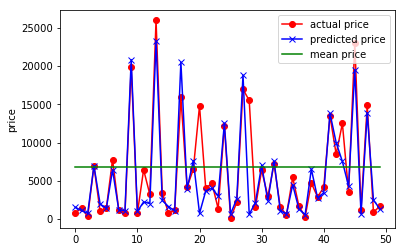

In [39]:
import random
num_samples=50
idx=random.sample(range(len(y_test)),num_samples)
plt.plot(range(num_samples),y_test[idx],'ro-')
plt.plot(range(num_samples),price_prediction[idx],'bx-')
plt.plot(range(num_samples),naive_prediction[idx],'g-')
plt.ylabel("price")
plt.legend(["actual price",'predicted price','mean price'])

However, there are some samples having large error between the prediction price and the actual price, especially for those records with actual prices larger than $10000. Two possible factors contributes to this phenomenon:

1. More than 78% of the data have prices less than \$10000. So train data for cars with prices higher than $10000 is in a small size. The inaccurate prediction to cars with high actual prices may be due to inadequate data for training the model.

2. The price of the advertised used car is not the exact value of that car. Because that price is affected by personal factors of an advertiser, so this price is not only determined by the details of a used car, but also related to the advertiser. However, there is no information about the advertiser in the dataset. Therefore, the inaccurate prediction to cars may also be due to inadequate information from the dataset.

In [40]:
display("There are {}% records with price less than $10000 in the dataset".\
        format(100.0*len(input_data[input_data.price<=10000])/len(input_data)))

'There are 78.854236512% records with price less than $10000 in the dataset'

From all the above, when the model's prediction is less than $10000, it can be taken as a relatively accurate prediction. While if the prediction is larger than 10000, it can be seen as a reference to indicate approximately in what range of the used car's price is, but is not accurate enough to directly evaluate the used car.

## V. Conclusion

### Free-Form visualization:

In the previous section, generally we see that prediction prices are more accurate for cars with low actual prices. We plot the absolute error for records ordered by actual prices to see if that conclusion makes sense. From the plot, it is seen that for most records with actual prices less than $10000, the absolute error keeps low. As long as the actual prices gets higher, the absolute error gets higher as well. Meanwhile, when the actual price is extremely low, the absolute error is also in a high level.

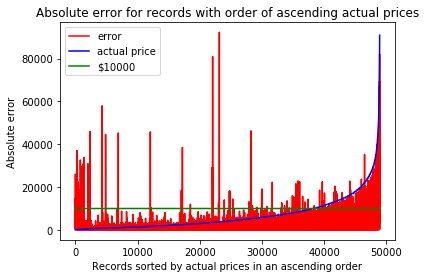

In [41]:
array1=y_test.reshape(np.shape(price_prediction))
price_max=np.concatenate((array1,price_prediction),axis=1)
sorted_price_max=price_max[price_max[:,0].argsort()]
plt.plot(abs(sorted_price_max[:,1]-sorted_price_max[:,0]),'r')
plt.plot(sorted_price_max[:,0],'b')
plt.plot(np.ones(len(y_test))*10000,'g')
plt.title("Absolute error for records with order of ascending actual prices")
plt.xlabel("Records sorted by actual prices in an ascending order")
plt.ylabel("Absolute error")
plt.legend(["error","actual price","$10000"])

The above observation suggests that the model performs differently for three types of data. It produces high absolute error for cars with very low or very high advertised prices, and makes more accurate predictions for cars with actual prices within a range that is neither too low nor too high. This can be verified by train a model for only records with actual prices within the range of [500,10000].

In [42]:
narrow_data=input_data[(input_data.price>=500) & (input_data.price<=10000)]

In [43]:
price_data_1=narrow_data['price']
features_data_1=narrow_data.drop('price',1)
scaler = MinMaxScaler()
numerical = ['yearOfRegistration', 'powerPS', 'kilometer','dateCrawled','dateCreated','lastSeen']
features_data_1[numerical] = scaler.fit_transform(narrow_data[numerical])
features_data_1 = pd.get_dummies(features_data_1)
encoded_1 = list(features_data_1.columns)
display("There are {} input features after one-hot encoding.".format(len(encoded_1)))

'There are 420 input features after one-hot encoding.'

In [44]:
X_train_val_2, X_test_2, y_train_val_2, y_test_2 = \
train_test_split(features_data_1, price_data_1, test_size = 0.2, random_state = 0)
X_train_2,X_val_2,y_train_2,y_val_2=\
train_test_split(X_train_val_2, y_train_val_2, test_size = 0.25, random_state = 0)
X_train_2=np.array(X_train_2)
y_train_2=np.array(y_train_2)
X_val_2=np.array(X_val_2)
y_val_2=np.array(y_val_2)
X_test_2=np.array(X_test_2)
y_test_2=np.array(y_test_2)

# Show the results of the split
print "Train set has {} samples.".format(X_train_2.shape[0])
print "Validation set has {} samples.".format(X_val_2.shape[0])
print "Test set has {} samples.".format(X_test_2.shape[0])

Train set has 111311 samples.
Validation set has 37104 samples.
Test set has 37104 samples.


In [45]:
price_predictor_2 = Sequential()

price_predictor_2.add(Dense(128,activation='relu', input_dim=420))
price_predictor_2.add(Dense(64))
price_predictor_2.add(Dense(32,activation='relu'))
price_predictor_2.add(Dense(8))
price_predictor_2.add(Dense(1))
price_predictor_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               53888     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 64,497
Trainable params: 64,497
Non-trainable params: 0
_________________________________________________________________


In [46]:
price_predictor_2.compile(optimizer='Adam', loss=loss_function)
checkpointer5 = ModelCheckpoint(filepath='price_model_2_best.hdf5', 
                               verbose=1, save_best_only=True)
price_predictor_2.fit(X_train_2, y_train_2, 
          validation_data=[X_val_2,y_val_2],
          epochs=20, batch_size=500, callbacks=[checkpointer5],verbose=0)

Epoch 00000: val_loss improved from inf to 1856.86120, saving model to price_model_2_best.hdf5
Epoch 00001: val_loss improved from 1856.86120 to 1529.83587, saving model to price_model_2_best.hdf5
Epoch 00002: val_loss improved from 1529.83587 to 1329.61886, saving model to price_model_2_best.hdf5
Epoch 00003: val_loss improved from 1329.61886 to 1215.28346, saving model to price_model_2_best.hdf5
Epoch 00004: val_loss improved from 1215.28346 to 1116.82083, saving model to price_model_2_best.hdf5
Epoch 00005: val_loss improved from 1116.82083 to 996.77546, saving model to price_model_2_best.hdf5
Epoch 00006: val_loss improved from 996.77546 to 922.22771, saving model to price_model_2_best.hdf5
Epoch 00007: val_loss improved from 922.22771 to 862.53282, saving model to price_model_2_best.hdf5
Epoch 00008: val_loss improved from 862.53282 to 845.82636, saving model to price_model_2_best.hdf5
Epoch 00009: val_loss improved from 845.82636 to 836.70909, saving model to price_model_2_best.h

In [47]:
price_predictor_2.load_weights('price_model_2_best.hdf5')
score=price_predictor_2.evaluate(X_test_2,y_test_2,verbose=1)
display("The model gets a score of {} for the test set.".format(score))

36608/37104 [============================>.] - ETA: 0s

'The model gets a score of 811.788090386 for the test set.'

By only using data with prices in a narrow range, the model's performance is improved. So building a submodel to determine if the used car is in a normal price class, a low price class or a high price class, then train models differently according to each class will improve the model's performance for the whole dataset.

### Reflection:

The process to solve the problem in this project is as following:

1. A proposed problem and its related dataset were found, described, and presented.

2. The dataset was investigated by sample observation, statistical investigation and visualization.

3. The candidate model and metrics were discussed.

4. The dataset was preprocessed and then be transformed into input data for training, validating, and testing the model.

5. A benckmark model was implemented and tested.

6. The neural network model was then implemented and improved from a simple linear model to a complicate nonlinear model.

7. Hyperparameters of the final model were tuned.

8. Model's outcome were observed and investigated. An experiment was taken to suggest a potential way to further improve the model.

It takes a lot of time in the stage 7 to tune the hyperparameters. At first, as more as possible layers and nodes are taken, then to reduce the overfitting, less and less layers and nodes are taken. At some point the model performance will decrease due to underfitting, then a finer search will be applied near that point of hyperparameters to find out the best model.

It also needs a lot of efforts to clean the abnormal records in dataset and preprocess the remained the data. Some ranges have been applied the the numerical fields to filter out the outliers from the data. While those ranges could be adjusted and will definitely affect the model's performance, as shown in the previous subsection.

It should noted that, the dataset itself may have some defects that can not be repaired. By realizing this, the process of collecting precise, accurate, relevant data with comprehensive information is one the most factors for successfully solving a real problem.

### Improvement:

As discussed before, a hybrid model may be developed as following to improve the outcome of this project:

1. A classification model is first trained to make a prediction of in what range a used car's price falls. There are three group of the used cars with prices in low range, normal range and high range, for example ranges of (0,500), [500,10000], (10000, 1000000].

2. For each class, a separate model will be trained with respect to the specific group of the data.

3. The two models will be combined to produce a hybrid model for generating predictions for used cars.